## 1 ). **Retomando el Sprint Poryect anterior, repito las conclusiones del final del Proyecto 1 para focalizar mi trabajo en ellas y así encarar el Proyecto 2:**

# Conclusiones del Srpint Proyect 1: 

## Selección del mejor modelo (con la cantidad de variables reducidas - "rooms" - "bedrooms" - "bathrooms" - "surface_total" - "surface_covered" - "price" + "property_type"):

- Si quisieramos estimar el precio sin diferenciar por tipo de propiedad, el mejor modelo a utilizar (el que logra el RMSE mas bajo) es el Tree Cassifier Regressor con 14 profundidades (RMSE < USD 200.000) que es mejor que el modelo de regresión lineal tomado como Benchmark. Este error sigue siendo muy elevado si se considera que desde un punto de vista de negocio, se quiere dar el precio mas exacto que se pueda.
- Si en cambio quisieramos estimar el precio por **tipo de propiedad**, este serían las mejores combinaciones y modelo según que propiedad se busque tasar:

 - **PH:**  Modelo de KNN con 12 vecinos (RMSE < USD 70.000). Si se elige un valor a la derecha (mayor a 12 vecinos) se corre riesgo de tener over fitting porque, se ve que al incrementar una unidad el numero de vecinos, el RMSE no disminuye.
 - **Departamento:** Modelo TREE con 21 depths (RMSE < USD 160.000). De ejegirse un valor a la derecha (mayor a 21) ocurre lo mismo que en el punto anterior.
 - **Casa**:  Modelo TREE con 3 depths (RMSE < USD 180.000). De ejegirse un valor a la derecha (mayor a 3) ocurre lo mismo que en el punto anterior.

## Preguntas para mejorar: Respondo entre líneas:

- ¿Qué mejorarías? 
 - Haría un mejor filtrado de outliers usando algún criterio estadístico como el Rango Inter Quartílico o la regla 3 Sigma.
- ¿Qué información no estás usando que podría ayudar al modelo?
 - No estoy usando la info de la zona de donde son las propiedades. Visto la gran influencia que tiene esto en elprecio, podría usarlo para hacer un mejor modelo. Estas son: "lat" -	"lon" -	"l1" - "l2"	- "l3".
- ¿Qué información puede estar demás o repetida?
 - Las variables "surface_total" con "surface_covered" puede resultar reiterativa por estar correlacionadas fuertemente entre sí. Podría adoptar solo una, y sumar otras variables que no estén correlacionadas entre ellas para darle mas generalidad a los modelos.

## **Voy a entrenar un modelo ML de DesicionTreeRegressor con la profunidad optimizada, aplicando los puntos desarrollados en los Story Points**.
- Mi benckmark va a ser un LinearRegression y el Tree final del Sprint 1 (ver conclusiones del principio).
- Las métricas que voy a estar utilizando para hacer la optimización de hiperparámetros y la comparación van a ser **RMSE**, **R2** y **Cross Validation**:
 - RMSE vs LinearRegression porque, como justifiqué en el sprint proyect 1, desde un punto de vista de negocio, cuanto mas preciso sea la estimación de precio que le hagamos a los clientes, mejor va a ser el servicio que ofrecemos.
 - R2 vs LinearRegression: Para tener una métrica adicional a la hora de comparar el output de los modelos.
 - Cross Validation: Para prevenir efectos de under u overfitting de los datos y verificar que tan "sano" es el modelo que obtuve.

In [ ]:
## Monto Google Drive para leer los datos desde el drive folder:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Importo las librerías báscias:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2 ). **Consignas del los story points:**

#Desarrollo del proyecto 2.

## A) **Transformación de Datos:**

- Debes implementar al menos **tres transformaciones de datos**. Disponibles:
 - Detección y eliminación de Outliers.
 - Encoding.
 - Imputación de valores faltantes.
 - Escalado de Datos.
 - Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

- Debes **justificar por qué creés que las transformaciones elegidas aplican en este dataset**. Ten en cuenta que, en el manejo de valores atípicos o en la imputación de valores faltantes, los valores obtenidos deben tener sentido. Por ejemplo, valores mayores que cero para superficies, número de baños, etc.
- Debes reentrenar un modelo del Sprint Project 01 y comparar su desempeño con el modelo obtenido. Una aclaración: con reentrenar nos referimos a usar el mismo proceso de entrenamiento junto con sus hiperparámetros. Pero puede ocurrir - y, de hecho, se espera - que el dataset contenga más atributos que los utilizados en el Sprint Project 01:
 - Tener en cuenta el Aárblol de desición y las conclusiones que obtuviste de los hiper parámetros elegidos.



## Carga de datos de Properati:

In [ ]:
## Cargo datos de properati:
data = pd.read_csv('/content/drive/MyDrive/Curso Acamica/Sprint 2/Proyecto 2/DS_Proyecto_01_Datos_Properati.csv')
n_orig_rows = data.shape[0]
data.head()


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


#  **Análisis Exploratorio de Datos:**
-  **Nota:** Dejo escrito en texto la info que voy recolectando, con las celdas que lo hacen ocultas para que sea mas prolijo.

**Me respondo las siguientes preguntas:**

- ¿Cuales son los nombres de los distintos atributos disponibles en el data set?
- ¿De qué tipo es cada atributo?
- ¿Cuantos valores faltantes tienen?

---------------------------------------------------------------------------------------------------------
Nombres de las columnas  Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')
---------------------------------------------------------------------------------------------------------
# **Datos faltantes**:
- Falantes en:  start_date :  0  valores.
- Falantes en:  end_date :  0  valores.
- Falantes en:  created_on :  0  valores.
- Falantes en:  lat :  9925  valores.
- Falantes en:  lon :  9959  valores.
- Falantes en:  l1 :  0  valores.
- Falantes en:  l2 :  0  valores.
- Falantes en:  l3 :  0  valores.
- Falantes en:  rooms :  0  valores.
- Falantes en:  bedrooms :  0  valores.
- Falantes en:  bathrooms :  5957  valores.
- Falantes en:  surface_total :  20527  valores.
- Falantes en:  surface_covered :  21614  valores.
- Falantes en:  price :  0  valores.
- Falantes en:  currency :  0  valores.
- Falantes en:  title :  0  valores.
- Falantes en:  description :  0  valores.
- Falantes en:  property_type :  0  valores.
- Falantes en:  operation_type :  0  valores.

----------------------------------------------
# **Data type de cada atributo del Dataframe :**
----------------------------------------------
- start_date          object
- end_date            object
- created_on          object
- lat                float64
- lon                float64
- l1                  object
- l2                  object
- l3                  object
- rooms              float64
- bedrooms           float64
- bathrooms          float64
- surface_total      float64
- surface_covered    float64
- price              float64
- currency            object
- title               object
- description         object
- property_type       object
- operation_type      object
- dtype: object

---------------------------------------
# **Selecciono las listas de atributos más relevantes para resolver el problema planteado:**

 - [**lat**	**lon**	**l2**	**l3**	**rooms**	**bedrooms**	**bathrooms**	**surface_total**	**surface_covered**	**property_type**]

A diferencia del modelo del primer sprint voy a estar agregando los siguientes atributos que son strings (voy a tener que encodear despues):

- **Porperty tyipe:** ['Departamento' 'PH' 'Casa' 'Lote' 'Casa de campo' 'Oficina' 'Otro'
 'Local comercial' 'Cochera' 'Depósito']
- **l2:** ['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Bs.As. G.B.A. Zona Norte'
 'Bs.As. G.B.A. Zona Oeste']
- **l3:** ['San Cristobal' 'Boedo' 'Palermo' 'La Plata' 'Villa Crespo'
 'Parque Patricios' 'Villa Pueyrredón' 'Pilar' 'Tigre' 'Abasto' 'Flores'
 'Morón' 'Nuñez' 'Almagro' 'Belgrano' 'Floresta' 'Recoleta' 'Balvanera'
 'Caballito' 'Chacarita' 'San Telmo' 'Colegiales' 'La Matanza'
 'San Isidro' 'San Miguel' 'Villa Luro' 'Barrio Norte' 'Las Cañitas'
 'San Nicolás' 'Villa Urquiza' 'Vicente López' 'Parque Centenario'
 'General San Martín' 'Villa General Mitre' 'Lanús' 'Ituzaingó' 'Boca'
 'Once' 'Retiro' 'Monserrat' 'Avellaneda' 'San Fernando' 'Puerto Madero'
 'Villa Ortuzar' 'Parque Chacabuco' 'Centro / Microcentro'
 'Tres de Febrero' 'Liniers' 'Coghlan' 'Congreso' 'Paternal' 'Saavedra'
 'Villa Santa Rita' 'Barracas' 'Villa Lugano' 'Constitución' 'Mataderos'
 'Villa Devoto' 'Parque Avellaneda' 'Villa del Parque'
 'Esteban Echeverría' 'Lomas de Zamora' 'Almirante Brown' 'Ezeiza'
 'San Vicente' 'Berazategui' 'Quilmes' 'Malvinas Argentinas' 'José C Paz'
 'Escobar' 'Moreno' 'General Rodríguez' 'Monte Castro' 'Pompeya' 'Merlo'
 'Marcos Paz' 'Florencio Varela' 'Agronomía' 'Presidente Perón'
 'Tribunales' 'Velez Sarsfield' 'Parque Chas' 'Hurlingham' 'Villa Real'
 'Versalles' 'Villa Riachuelo' 'Cañuelas' 'Villa Soldati' 'Catalinas']

In [ ]:
# Nombres de las clumnas:
nombre_columnas = data.columns # Me armo un vector con los nombres de las columnas

print('---------------------------------------------------------------------------------------------------------')
print('Nombres de las columnas ',nombre_columnas)  # Imprimo los nombres para mirar como los indica.
print('---------------------------------------------------------------------------------------------------------')

bool_mat = data.isna() # Crea data frame de booleans donde un true es un blank y un false es que existe un dato.

#Ahora voy recorriendo con un for loop el nombre de cada columna y sumo todos los faltantes en cada columna. 

for nombre in nombre_columnas: # Voy iterando el nombre del vector nombre_columnas con un for.
    print('Falantes en: ',nombre,': ',sum(bool_mat[nombre]),' valores.')

# 1. ¿De qué tipo es cada atributo?:
# Para ver los tipos de datos que tenemos:

dataTypeSeries = data.dtypes

print('')
print('---------------------------------------')
print('Data type of each column of Dataframe :')
print('---------------------------------------')
print(dataTypeSeries)

print('')
print('---------------------------------------')
print(data['property_type'].unique())
print(data['l2'].unique())
print(data['l3'].unique())

## Hago un data corr para ver las correlaciones entre atributos numericos:

data.corr()

---------------------------------------------------------------------------------------------------------
Nombres de las columnas  Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')
---------------------------------------------------------------------------------------------------------
Falantes en:  start_date :  0  valores.
Falantes en:  end_date :  0  valores.
Falantes en:  created_on :  0  valores.
Falantes en:  lat :  9925  valores.
Falantes en:  lon :  9959  valores.
Falantes en:  l1 :  0  valores.
Falantes en:  l2 :  0  valores.
Falantes en:  l3 :  0  valores.
Falantes en:  rooms :  0  valores.
Falantes en:  bedrooms :  0  valores.
Falantes en:  bathrooms :  5957  valores.
Falantes en:  surface_total :  20527  valores.
Falantes en:  surface_covered :  21614  va

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.975578,-0.010933,0.007618,0.019923,-0.019598,-0.004156,0.013393
lon,-0.975578,1.000000,-0.006931,-0.016905,-0.028612,-0.049097,-0.014388,0.009368
rooms,-0.010933,-0.006931,1.000000,0.869769,0.613308,0.081044,0.075012,0.351025
bedrooms,0.007618,-0.016905,0.869769,1.000000,0.588527,0.079229,0.072627,0.316192
bathrooms,0.019923,-0.028612,0.613308,0.588527,1.000000,0.061159,0.069361,0.556861
surface_total,-0.019598,-0.049097,0.081044,0.079229,0.061159,1.000000,0.430887,0.038727
surface_covered,-0.004156,-0.014388,0.075012,0.072627,0.069361,0.430887,1.000000,0.049136
price,0.013393,0.009368,0.351025,0.316192,0.556861,0.038727,0.049136,1.000000


# **Conclusion de lo visto en las correlaciones y chequeo de valores faltantes:**
- rooms correlaciona muy fuerte con bedrooms y bathrooms.
- Price correlaciona muy fuerte con bathrooms.
- Como bathrooms tiene valores fantantes, y tiene una dependencia lineal muy fuerte con **bedrooms** y **price**, podría dejarse a fuera si se ve que mejora la performance del modelo. Por ahora no lo saco y veo como performa el modelo.

**Nota**: La idea aca es no usar información repetida.

# A) **Transformación de datos:** Justificación de la elección.


Antes de definir que hacer con los datos, estos son los que mas me interesan:
## Me interesan para conformar el data set total y definitivo: (A estas voy a tener que hacerle un tratamiento de faltantes y outliers si veo que mi modelo no es del todo preciso).

- **lat:**                float64
- **lon:**                float64
- **l2:**                  object
- **l3:**                  object
- **rooms:**              float64
- **bedrooms:**           float64
- **bathrooms:**          float64
- **surface_total:**      float64
- **surface_covered:**    float64
- **price:**              float64
- **property_type:**       object

Para tratarlos voy a estar utilizando las siguientes transformaciones de datos:

- **Detección y eliminación de outilers**: Basado en experiencia del proyect anterior hay datos mal cargados e incongruencias como propiedades con superficies gigantes o cantidad de baños que no tienen sentido, o precios muy alejados a la media del data set. La idea es tener un set de datos lo mas "sano posible". (Tener en cuenta de incluir la imputación de "missing" con un pipeline). Lo voy a hacer para las siguientes variables numericas que elegi:

 - **lat:**                float64
 - **lon:**                float64
 - **rooms:**              float64
 - **bedrooms:**           float64
 - **bathrooms:**          float64
 - **surface_total:**      float64
 - **surface_covered:**    float64
 - **price:**              float64

- **Encoders** porque existen variables que brindan mucha información pero están en fomrato "texto". Estas son las localidad de donde son las propiedades y los barrios. Las que me interasan para encodear son: (Estas brindan info peroson stirings).
 - **l2 y l3:** l2 --> Zona de G.B.A y A.M.B.A, l3 --> Barrio.
 - **property_type:** ['Departamento' 'PH' 'Casa' 'Lote' 'Casa de campo' 'Oficina' 'Otro' 'Local comercial' 'Cochera' 'Depósito']
 - Realizando este método tengo que el tamaño del data set se incrementaría de la siguiente forma:

- **Escalado de datos**: Voy a escalar las variables numéricas. Esta elección está motivada por el hecho de que surface total y surface covered toman valores muy grandes. De esta forma los hago mas facil de compara para el modelo.

 - No hay que perder de vista que existen cosas con valores faltantes y son:

   - Falantes en:  lat :  9925  valores.
   - Falantes en:  lon :  9959  valores.
   - Falantes en:  bathrooms :  5957  valores.
   - Falantes en:  surface_total :  20527  valores.
   - Falantes en:  surface_covered :  21614  valores.

# **Para la parte de encoders me interesa saber como se incrementa teoricamente mi data set usando la tecnica 0ne-Hotencoding:**
-------------------------
---TAMAÑO POR ATRIBUTO---
-------------------------
- 10 : property_type
- 4 : l2
- 89 : l3
- Sub Total: 103
----------------------------
- N° Columnas originales: 11
- N° Filas totales: 146660
- N° campos totales: 1613260
----------------------------
- Total columnas del data set encodeado: 114
- Total de campos del data set encodedado: 16719240
----------------------------
- Incremento porcentual de la cantidad de columnas del data set: 936.36 % 
- Incremento porcentual de la cantidad de campos del data set: 936.36 %

## **Nota**: Voy a investigar si esta info nueva puede guardarse de forma esparsa (en una matriz sparse) para reducir el gasto computacional en el guardado de los datos.



In [ ]:
# 2. Llevo todos los atributos que me interesan a una forma numérica. ¿Cómo creció mi dataset?
# Cuantifico cuantos nombres diferentes hay en cada atributo para saber en cuanto se me incrementa la cantidad de datos:

cols = ['lat', 'lon','l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price','property_type']

n_orig_cols = 11

s_pt = data['property_type'].unique().shape[0]
s_l1 = data['l1'].unique().shape[0]
s_l2 = data['l2'].unique().shape[0]
s_l3 = data['l3'].unique().shape[0]

print('---TAMAÑO POR ATRIBUTO---')
print(str(s_pt) + ' : property_type')
print(str(s_l2) + ' : l2')
print(str(s_l3) + ' : l3') 
print('Sub Total: ' + str(s_pt + s_l2 + s_l3))
print('----------------------------')
print('N° Columnas originales: ' + str(n_orig_cols))
print('N° Filas totales: ' + str(n_orig_rows))
print('N° campos totales: ' + str(n_orig_cols*n_orig_rows))
print('----------------------------')
print('Total columnas del data set encodeado: ' + str(n_orig_cols + s_pt +  s_l2 + s_l3))
print('Total de campos del data set encodedado: ' + str((n_orig_cols + s_pt +  s_l2 + s_l3)*n_orig_rows))
print('----------------------------')
print('Incremento porcentual de la cantidad de columnas del data set: ' + str((((n_orig_cols + s_pt +  s_l2 + s_l3)-(n_orig_cols))/(n_orig_cols))*100) + ' % ')
print('Incremento porcentual de la cantidad de campos del data set: ' + str(((((n_orig_cols + s_pt + s_l2 + s_l3)*n_orig_rows)-(n_orig_cols*n_orig_rows))/(n_orig_cols*n_orig_rows))*100) + ' % ')

---TAMAÑO POR ATRIBUTO---
10 : property_type
4 : l2
89 : l3
Sub Total: 103
----------------------------
N° Columnas originales: 11
N° Filas totales: 146660
N° campos totales: 1613260
----------------------------
Total columnas del data set encodeado: 114
Total de campos del data set encodedado: 16719240
----------------------------
Incremento porcentual de la cantidad de columnas del data set: 936.3636363636364 % 
Incremento porcentual de la cantidad de campos del data set: 936.3636363636364 % 


# **En esta sección voy a llevar a cabo los dos primeros procesos de la**  
#A) **Transformación de Datos:**

- **Detección y eliminación de outliers.**: Con una serie de box plots y análisis exploratorio de datos.
- **Encoding.**: Con One-Hotencoding.
-(**Escaleo de datos**) Lo dejo para el final para intentar mejorar el RMSE respecto de comparar lo obtenido con la estrategia de los dos primeros.

## Pasos:
- 1) Hago un filtro de outliers de las que ya son numericas: Uso un set de boxplots. Lo hago para mis variables predictoras: 
**X = [lat	lon	l2	l3	rooms	bedrooms	bathrooms	surface_total	surface_covered	property_type]**
- 2) Paso las variables string a numericas con el metodo:  **One-Hot Encoding** de lo que voy a usar para entrenar a mi modelo que es X = [lat	lon	l2	l3	rooms	bedrooms	bathrooms	surface_total	surface_covered	property_type], para tratar de predecir Y = [price] -- Para esto tengo que sacar todas las instancias que no tengan información, PORQUE **de los datos que elijo para mi modelo, hay instancias con faltantes. (Voy a dropearlos en primera instancia y ver como resultan las métricas del modelo de ML).**
- 3) Adicional: Estaría bueno hacer todos estos pasos con un Pipeline. Voy a ver si lo puedo conceptualzar y realizar.

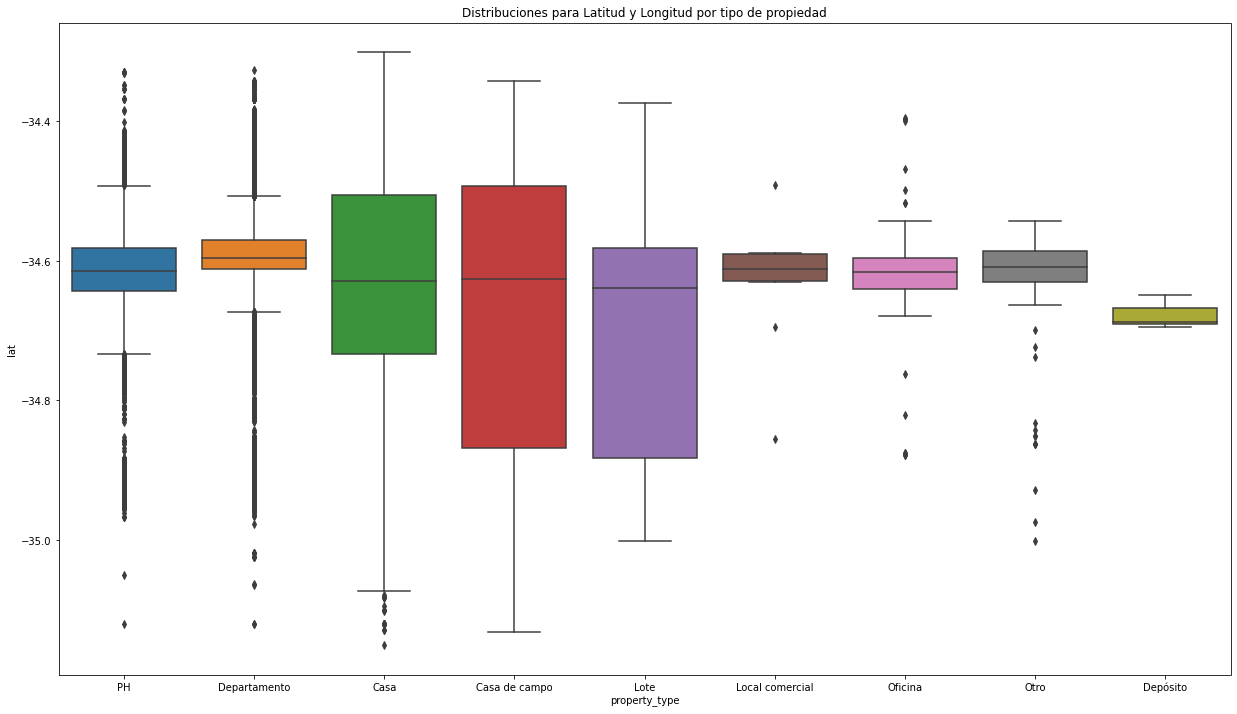

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


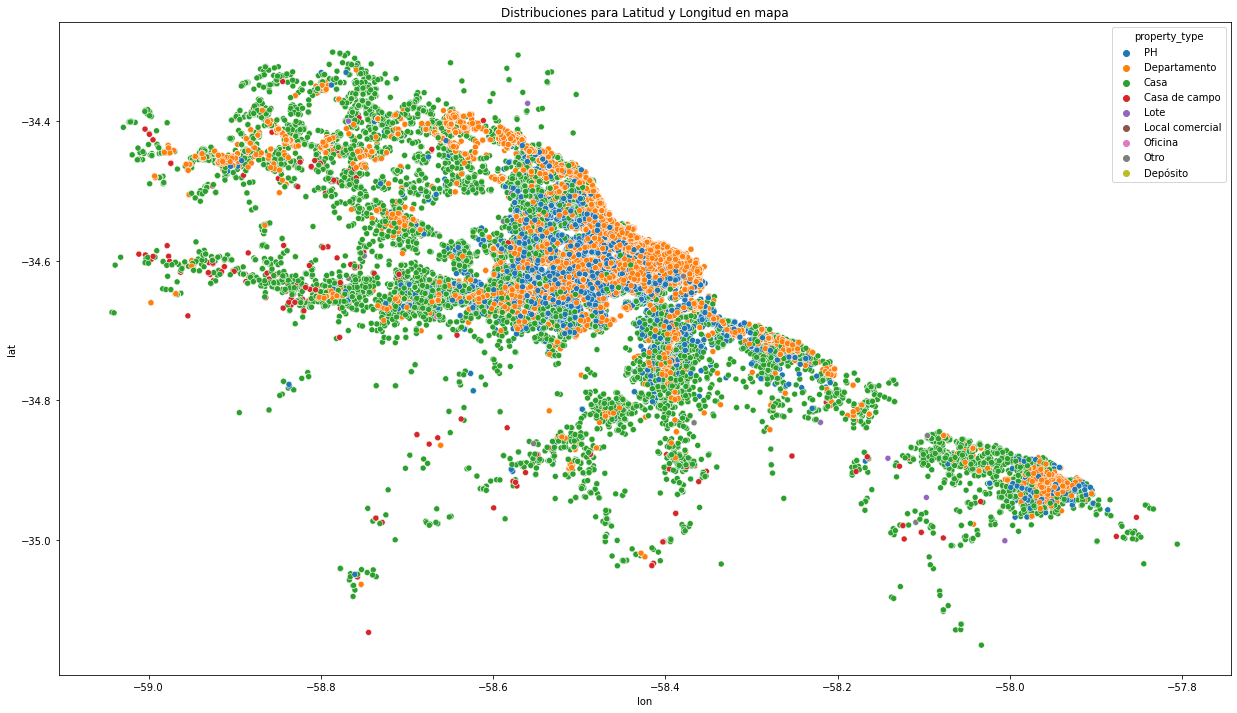

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


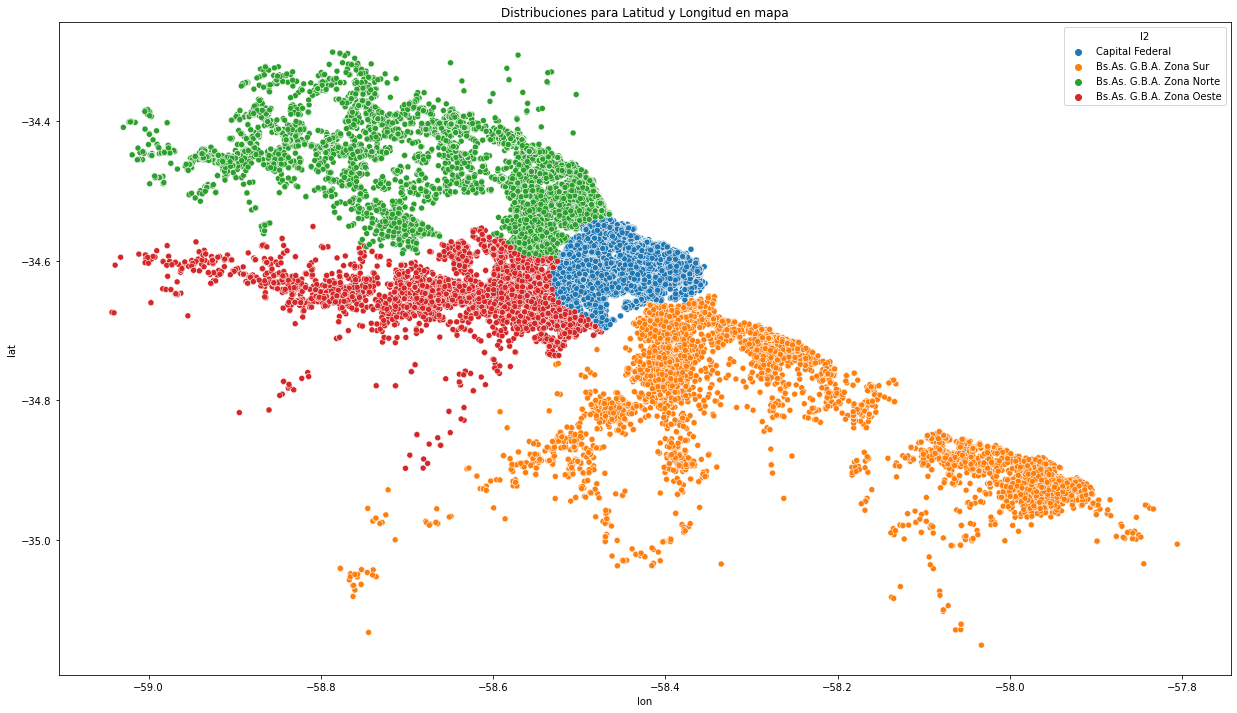

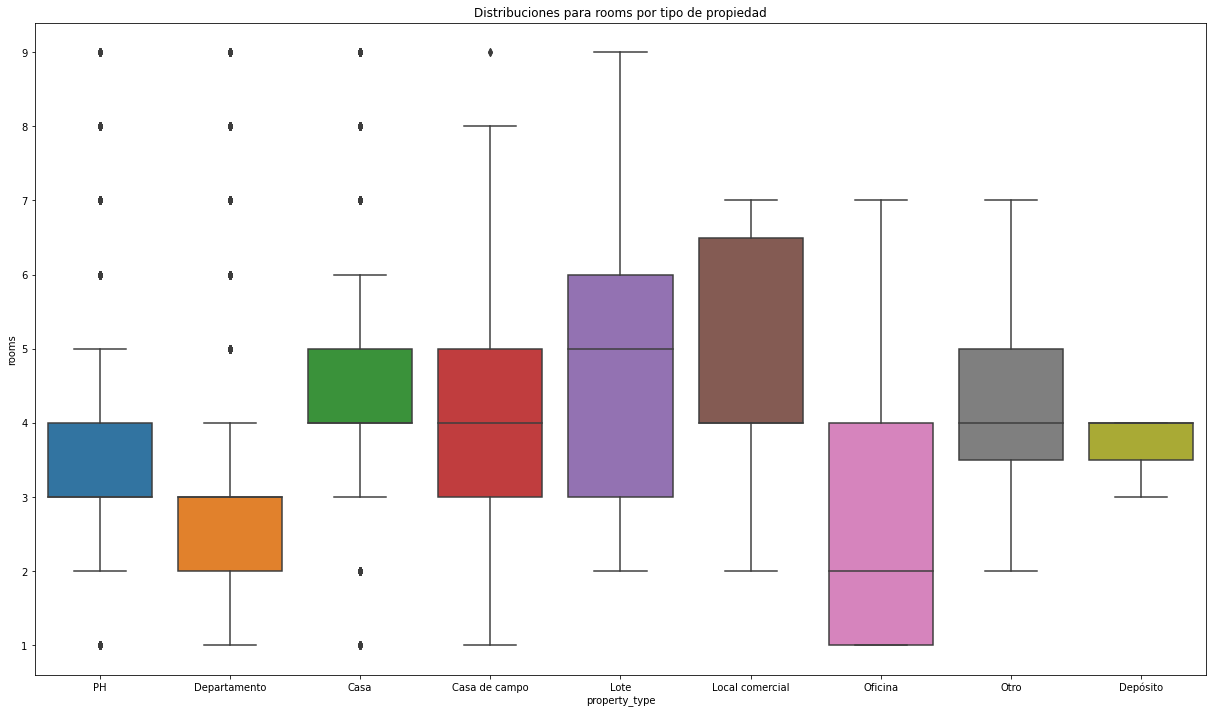

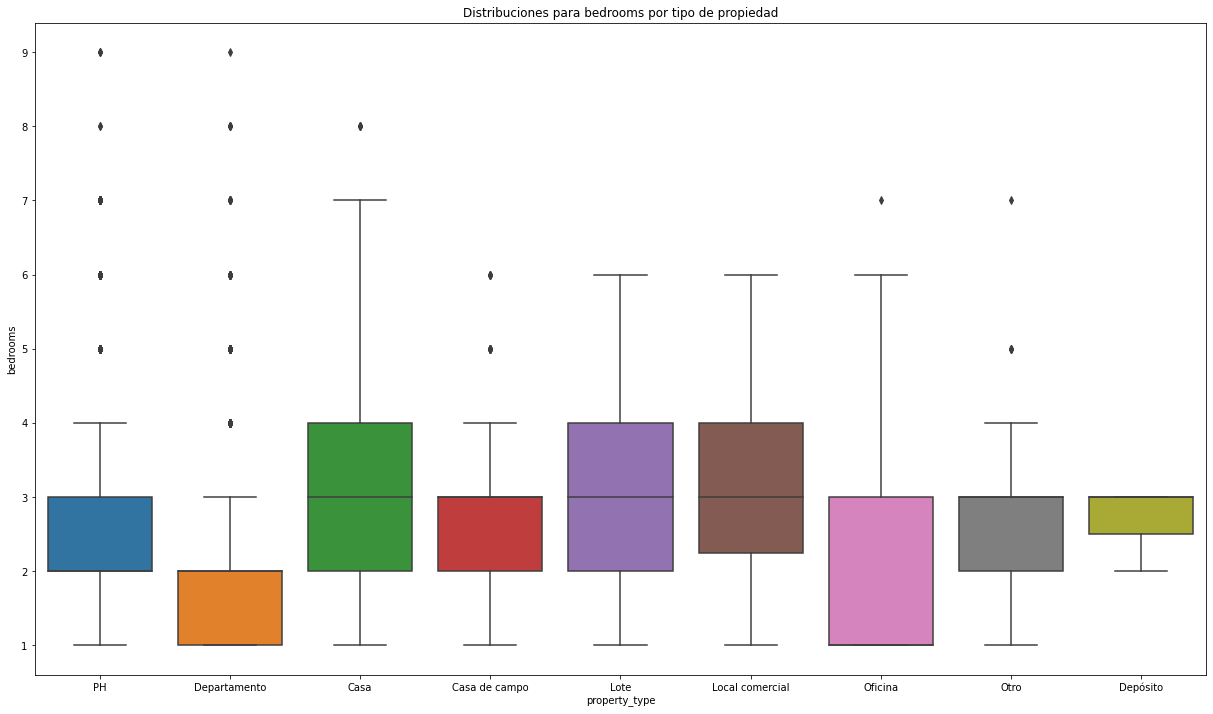

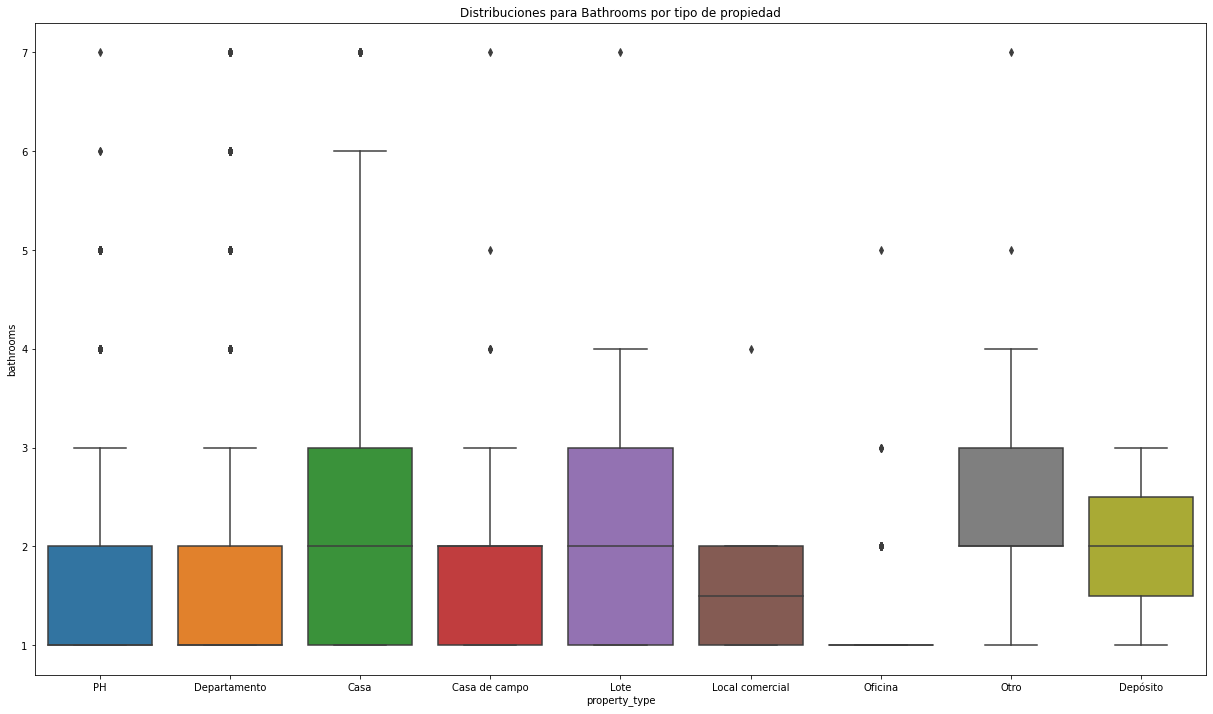

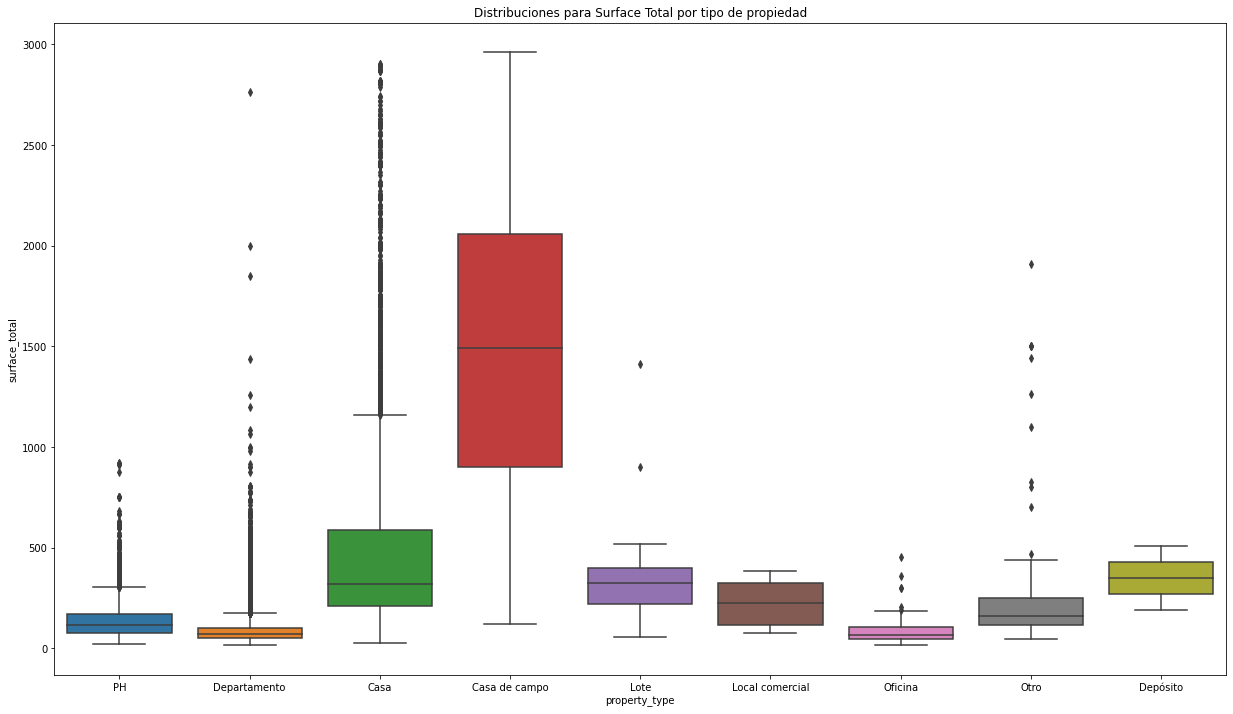

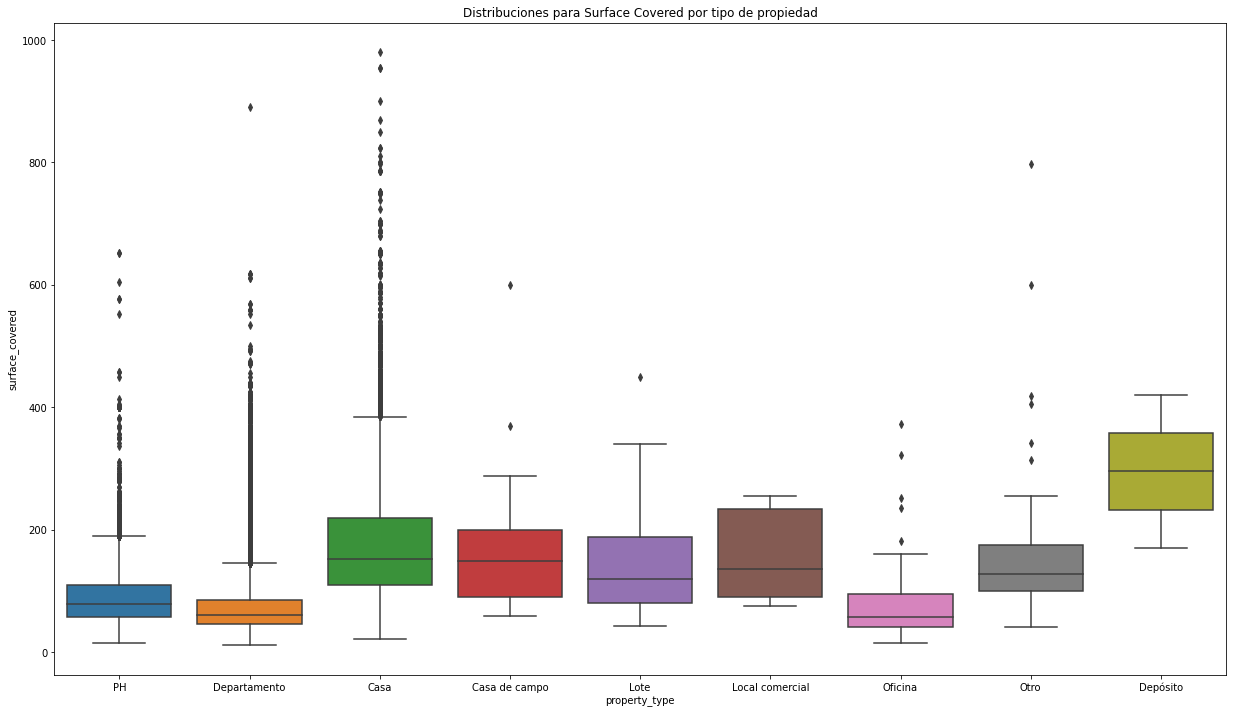

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


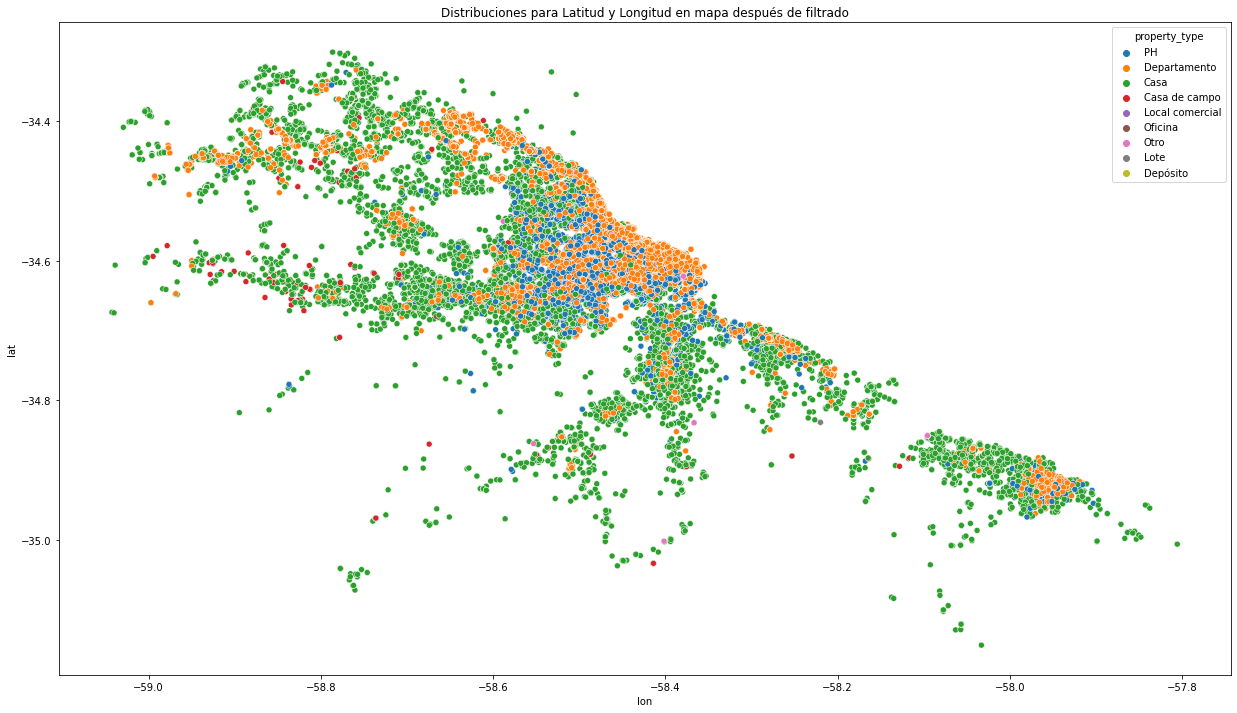

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


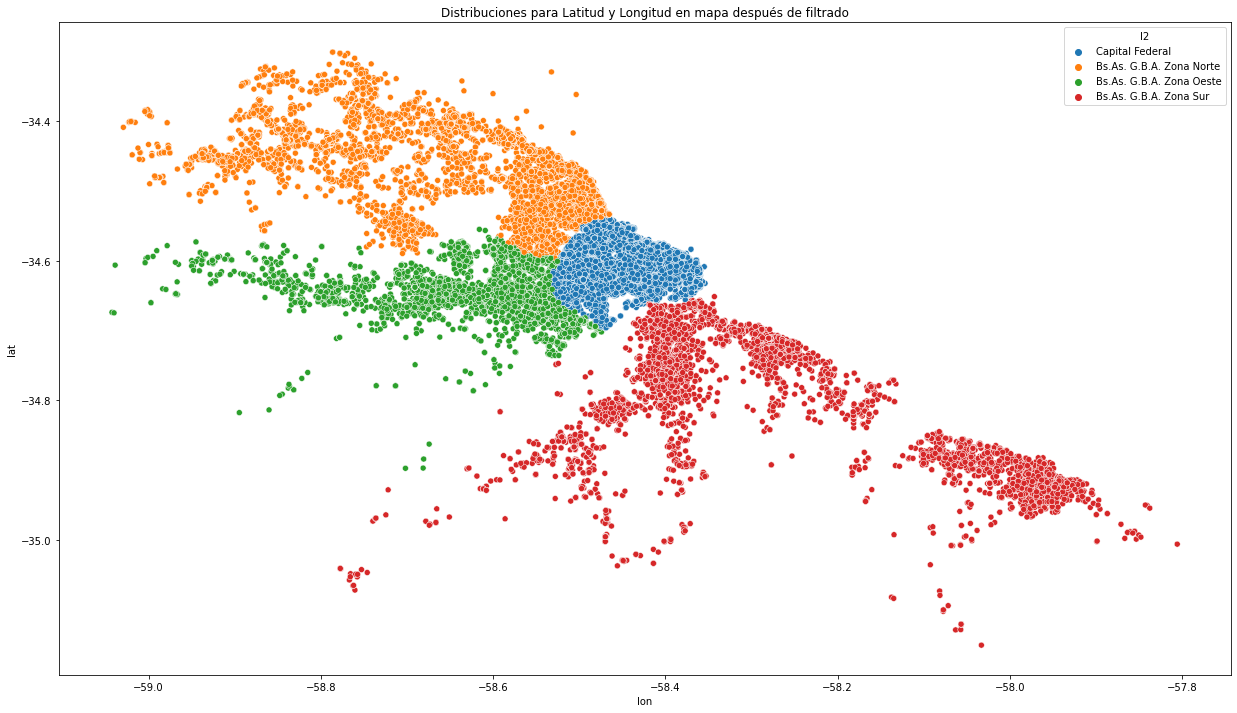

Queda remanente el 50.83253784262921 % del data set


In [ ]:
## Grafico todos los box plot para ver que criterio de filtrado de outliers tomo: #ax = sns.boxplot(x="property_type", y="lat", data=data)
 
numeric_cols = ['lat', 'lon','rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered','price']
categ_cols = ['l2','l3','property_type']

#---------------------------
# Algunos filtros generales:
#---------------------------

# Filtrado de data.surface_covered < data.surface_total

indx_ST_ma_SC = data.surface_covered < data.surface_total  # Vector booleano con los indices True donde se cumple la condición correcta.
data = data[indx_ST_ma_SC] # Mi nueva data son todas las intancias que cumplen con la condicion "sana"

#---------------------
## Latitud y longitud:
#---------------------

# Filtros:
data = data[(data.lat)<80]
data = data[(data.lat)<-34.3]

fig= plt.figure(figsize=(21,12))
ax = sns.boxplot(data=data,x="property_type", y="lat")
plt.title('Distribuciones para Latitud y Longitud por tipo de propiedad')
plt.show()

fig= plt.figure(figsize=(21,12))
sns.scatterplot(data.lon,data.lat, hue = 'property_type', data = data)
plt.title('Distribuciones para Latitud y Longitud en mapa')
plt.show()

fig= plt.figure(figsize=(21,12))
sns.scatterplot(data.lon,data.lat, hue = 'l2', data = data)
plt.title('Distribuciones para Latitud y Longitud en mapa')
plt.show()

#--------
## Rooms:
#--------

# Filtros:
data = data[(data.rooms)< 10 ]
data = data[(data.rooms)> 0 ]

fig= plt.figure(figsize=(21,12))
ax = sns.boxplot(x="property_type", y="rooms", data=data)
plt.title('Distribuciones para rooms por tipo de propiedad')
plt.show()

#------------
## Bed rooms:
#------------

# Filtros:

data = data[(data.bedrooms)< 10 ]
data = data[(data.bedrooms)> 0 ]

fig= plt.figure(figsize=(21,12))
ax = sns.boxplot(x="property_type", y="bedrooms", data=data)
plt.title('Distribuciones para bedrooms por tipo de propiedad')
plt.show()

#------------
## Bathrooms:
#------------

# Filtros:

data = data[(data.bathrooms)< 8 ]
data = data[(data.bathrooms)> 0 ]

fig= plt.figure(figsize=(21,12))
ax = sns.boxplot(x="property_type", y="bathrooms", data=data)
plt.title('Distribuciones para Bathrooms por tipo de propiedad')
plt.show()

#---------------
## Surface Total:
#---------------

# Filtros:

data = data[(data.surface_total)< 3000 ]
data = data[(data.surface_total)> 10]

fig= plt.figure(figsize=(21,12))
ax = sns.boxplot(x="property_type", y="surface_total", data=data)
plt.title('Distribuciones para Surface Total por tipo de propiedad')
plt.show()

#------------------
## Surface Covered:
#------------------

# Filtros:

data = data[(data.surface_covered)< 1000 ]
data = data[(data.surface_covered)> 10]

fig= plt.figure(figsize=(21,12))
ax = sns.boxplot(x="property_type", y="surface_covered", data=data)
plt.title('Distribuciones para Surface Covered por tipo de propiedad')
plt.show()


#---------
## Price:
#---------

data = data[(data.price)< 2000000 ]
data = data[(data.price)> 80000]

# Escaleo de price:????

# stdv =  data.price.std(axis = 0)
# med = data.price.mean(axis = 0)

# data['price_zscore'] = (data.price - med)/stdv

# fig= plt.figure(figsize=(21,12))
# ax = sns.boxplot(x="property_type", y="price", data=data)
# plt.title('Distribuciones para Price por tipo de propiedad')
# plt.show()

## Analizo distribución de price:

# fig= plt.figure(figsize=(21,12))
# sns.kdeplot(data=data.price, shade = True)
# plt.title('Análisis de criterio 3 sigma  - Price')
# plt.show()

# fig= plt.figure(figsize=(21,12))
# sns.kdeplot(data=data.price_zscore, shade = True)
# plt.title('Análisis de criterio 3 sigma  - Z.score Price')
# plt.show()

#---------------------------------------------------
## Verifico como queda el mapa final de propiedades:
#---------------------------------------------------

fig= plt.figure(figsize=(21,12))
sns.scatterplot(data.lon,data.lat, hue = 'property_type', data = data)
plt.title('Distribuciones para Latitud y Longitud en mapa después de filtrado')
plt.show()

fig= plt.figure(figsize=(21,12))
sns.scatterplot(data.lon,data.lat, hue = 'l2', data = data)
plt.title('Distribuciones para Latitud y Longitud en mapa después de filtrado')
plt.show()

#----------------------------------------------------------------------------------------------
## Verifico cuanta data queda después de los filtros respecto de la original que calculé antes:
#----------------------------------------------------------------------------------------------

n_remanant_rows =  data.shape[0]

print('Queda remanente el ' + str((n_remanant_rows/n_orig_rows)*100) + ' % del data set')


# Tratamiento de valores faltantes:

In [ ]:
# Por ahora dropeo todos los faltantes:
data.dropna(axis = 0, inplace = True) # Por ahora no relleno los datos faltantes. Simplemente me los saco de ensima.
print(data.shape)
data.head()

#----------------------------------------------------------------------------------------------
## Verifico cuanta data queda después de los filtros respecto de la original que calculé antes:
#----------------------------------------------------------------------------------------------
n_orig_rows # Cantidad de rows del data set original
n_remanant_rows =  data.shape[0]

print('Queda remanente el ' + str((n_remanant_rows/n_orig_rows)*100) + ' % del data set')

(74551, 19)
Queda remanente el 50.83253784262921 % del data set


In [ ]:
## Re chequeo datos faltantes:

bool_mat = data.isna() # Crea data frame de booleans donde un true es un blank y un false es que existe un dato.

#Ahora voy recorriendo con un for loop el nombre de cada columna y sumo todos los faltantes en cada columna. 

for nombre in nombre_columnas: # Voy iterando el nombre del vector nombre_columnas con un for.
    print('Falantes en: ',nombre,': ',sum(bool_mat[nombre]),' valores.')

Falantes en:  start_date :  0  valores.
Falantes en:  end_date :  0  valores.
Falantes en:  created_on :  0  valores.
Falantes en:  lat :  0  valores.
Falantes en:  lon :  0  valores.
Falantes en:  l1 :  0  valores.
Falantes en:  l2 :  0  valores.
Falantes en:  l3 :  0  valores.
Falantes en:  rooms :  0  valores.
Falantes en:  bedrooms :  0  valores.
Falantes en:  bathrooms :  0  valores.
Falantes en:  surface_total :  0  valores.
Falantes en:  surface_covered :  0  valores.
Falantes en:  price :  0  valores.
Falantes en:  currency :  0  valores.
Falantes en:  title :  0  valores.
Falantes en:  description :  0  valores.
Falantes en:  property_type :  0  valores.
Falantes en:  operation_type :  0  valores.


# Separacion en X e y antes de encodear:

In [ ]:
# Separo entre mi df X e y para encodear:

X = data[['lat','lon','l2','l3','rooms','bedrooms','bathrooms','surface_total','surface_covered','property_type']]
Y = data['price']

# 1) **Paso las variables string a numericas con el metodo: OneHotEncoder**

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

column_trans = make_column_transformer((OneHotEncoder(sparse = False), ['l2','l3','property_type']),remainder = 'passthrough')

X_transf = column_trans.fit_transform(X) # Encodeo mi X para el modelo

## Para el **Modelo de ML:** Voy a probar primero con un Tree usando el linear regressor de benckmark, y con un depth de 14 teniendo en cuenta el primero punto de las conclsiones del sprint anterior donde digo: **Tree Cassifier Regressor con 14 profundidades (RMSE < USD 200.000)**. Después hago una optimización de Hiper Parámetros y veo si mejora.
## Metricas:
- **RMSE** : Como en el sprint proyect anterior, la idea es poder brindar el moejor servicio de tasación como sea posible. Dar precios certeros es la mejor forma de hacerlo. Por eso voy a buscar minimizar este indicador. 

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 110860.76154237402
Raíz del error cuadrático medio en Test: 109695.21955569222


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


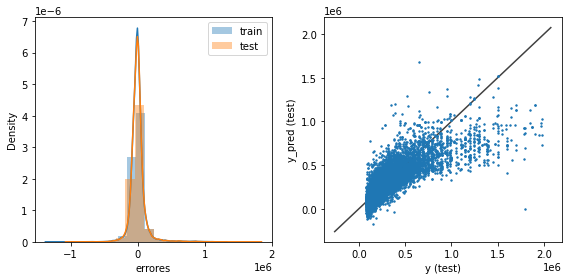

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 47568.533997078455
Raíz del error cuadrático medio en Test: 83487.034726294


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


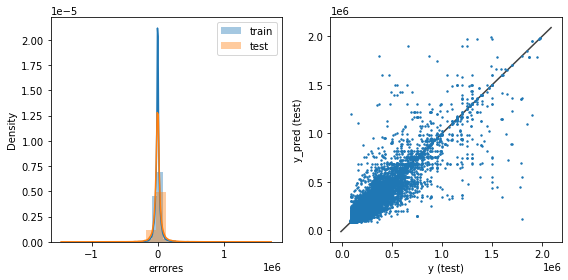

In [ ]:
## Elijo mi set de train y test:

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = X_transf
y = np.array(Y)

## Obtengo los datos TRAIN y TEST: 

#X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

#--------------------------
## Benchmark: linear model:
#--------------------------

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#print(linear_model.coef_, linear_model.intercept_)

#--------------------
## B.2) DecisionTree:
#--------------------

tree_regressor = DecisionTreeRegressor(max_depth=14, random_state=42)
tree_regressor.fit(X_train, y_train)
  
##-------------------------------
# Calculos de errores y graficos:
##-------------------------------


modelos = ['Regresión lineal', 'Árbol de Decisión']

for i, model in enumerate([linear_model, tree_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')

    ## Estas son las metricas que voy a usar a lo largo del desarrollo de todos los 
    #  modelos de ML que voy a ir haciendo para tratar de llegar a un óptimo:

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) # error cuadrático en USD
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

# **Primeras conclusiones**:
- El RMSE en Test para el Tree es alto USD 83.487
- El Tree es un poco mejor que el benchmark.
- El Tree con los datos adicionales encodeados que le agregúe respecto al que hice en el Sprint Proyect 1 (RMSE de aprox USD 200.000) mejoró un 58% en el RMSE.

# Hago una optimización de Hiper Parámetro depth para ver si lo puedo seguir mejorando.

## Optimización de hiper parámetros:
- Busco minimizar RMSE con los depths del tree.

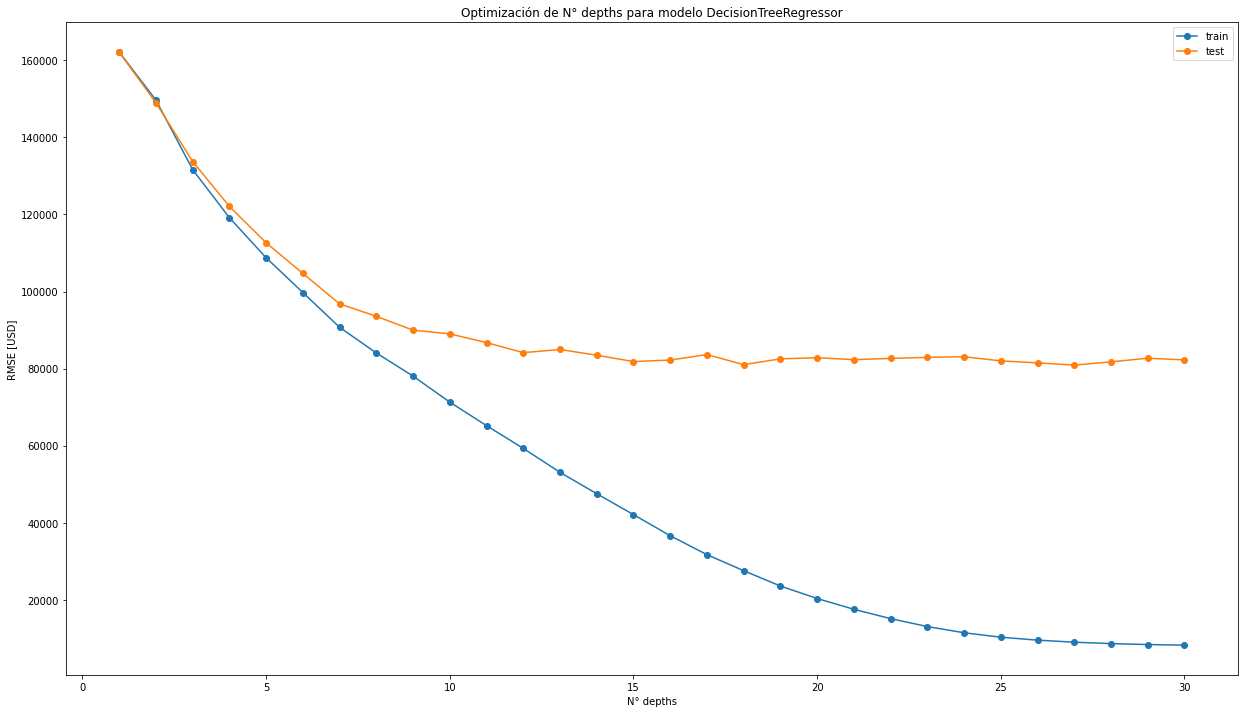

In [ ]:
#--------------------
## B.2) DecisionTree:
#--------------------

# Definimos las listas vacias para los valores de RMSE deseados:

lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de k que vamos a explorar:

max_depths = 30
n_depths = list(range(1,max_depths+1)) 

# Generamos un loop sobre los distintos valores de k 
for k in n_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf =  DecisionTreeRegressor(max_depth=k, random_state=42)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) # error cuadrático en USD
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred)) 
    
    # Agregar la información a las listas
    lista_rmse_train.append(rmse_train )
    lista_rmse_test.append(rmse_test)


fig= plt.figure(figsize=(21,12))
plt.plot(n_depths,lista_rmse_train,'o-',label='train' )
plt.plot(n_depths,lista_rmse_test,'o-',label='test')
plt.legend()
plt.xlabel('N° depths')
plt.ylabel('RMSE [USD]')
plt.title('Optimización de N° depths para modelo DecisionTreeRegressor')
plt.show()

# **Segundas conclusiones**:
- Tomo **max depth como 18 depths** porque minimisa RMSE.
- Si tomo un número mayor a 18 puedo correr riesgo de overfitting.

##  **Modelo de ML: Tomo max depth como 18 depths porque minimisa RMSE.**

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 110860.76154237402
Raíz del error cuadrático medio en Test: 109695.21955569222


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


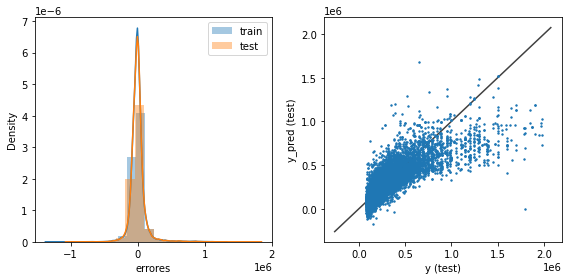

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 27598.314797154817
Raíz del error cuadrático medio en Test: 81043.5398083964


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


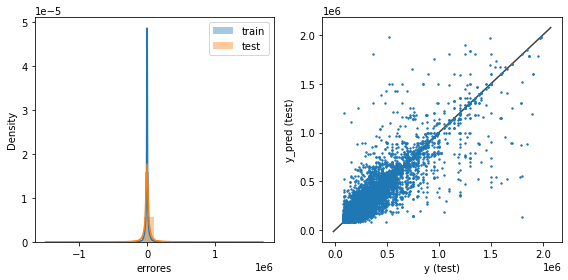

In [ ]:
## Elijo mi set de train y test:

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = X_transf
y = np.array(Y)

## Obtengo los datos TRAIN y TEST: 

#X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

#--------------------------
## Benchmark: linear model:
#--------------------------

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#print(linear_model.coef_, linear_model.intercept_)

#--------------------
## B.2) DecisionTree:
#--------------------

tree_regressor = DecisionTreeRegressor(max_depth=18, random_state=42)
tree_regressor.fit(X_train, y_train)
  
##-------------------------------
# Calculos de errores y graficos:
##-------------------------------


modelos = ['Regresión lineal', 'Árbol de Decisión']

for i, model in enumerate([linear_model, tree_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')

    ## Estas son las metricas que voy a usar a lo largo del desarrollo de todos los 
    #  modelos de ML que voy a ir haciendo para tratar de llegar a un óptimo:

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) # error cuadrático en USD
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

# **Terceras conclusiones**:
- El RMSE en Test para el Tree es alto pero mejor que con 14 deptsh. USD 83.487 vs USD 81.043.
- El Tree es un poco mejor que el benchmark.
- El Tree con depth de 18 vs depth 14 (ambos datos encodeados) mejoró en **un 3% en el RMSE.**

# A) **Transformación de datos:**
 - **Escaleo:** El objetivo es bajar el RMSE desde USD 81.043 al mínimo posible haciendo además un escaleo.

## **Nota:** Repito los pasos de Encoding y le sumo Escaleo para poder correr esta sección independiente de las anteriores.

In [ ]:
# Separo entre mi df X e y para encodear:

X = data[['lat','lon','l2','l3','rooms','bedrooms','bathrooms','surface_total','surface_covered','property_type']]
Y = data['price']

1) **Escaleo:**
- lat.
- long.
- rooms.
- bedrooms.
- bathrooms.
- surface_total.
- surface_covered.


In [ ]:
#scale_cols = ['lat','lon','rooms','bedrooms','bathrooms','surface_total','surface_covered']

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()

column_trans = make_column_transformer((StandardScaler(), ['lat','lon','rooms','bedrooms','bathrooms','surface_total','surface_covered']),remainder = 'passthrough')

data_scaled = column_trans.fit_transform(X)
data_sclaed_df = pd.DataFrame(data_scaled)
data_sclaed_df


,0,1,2,3,4,5,6,7,8,9
0,-0.334462,0.418749,-0.960976,-1.13164,0.421726,-0.37927,-0.519335,Capital Federal,Boedo,PH
1,0.118946,0.233614,-0.960976,-1.13164,-0.755717,-0.314427,-0.635225,Capital Federal,Palermo,PH
2,-0.499265,0.362394,-1.74214,-1.13164,-0.755717,-0.487343,-0.823547,Capital Federal,Parque Patricios,PH
3,-0.499265,0.362394,-1.74214,-1.13164,-0.755717,-0.487343,-0.823547,Capital Federal,Parque Patricios,PH
4,0.0666619,-0.213113,-0.960976,-1.13164,0.421726,-0.396562,-0.649712,Capital Federal,Villa Pueyrredón,PH
...,...,...,...,...,...,...,...,...,...,...
74546,1.54452,-1.23766,-0.179816,-0.147368,0.421726,-0.292812,-0.200637,Bs.As. G.B.A. Zona Norte,Tigre,Departamento
74547,1.56802,-1.14977,-0.179816,-0.147368,0.421726,-0.266875,-0.157178,Bs.As. G.B.A. Zona Norte,Tigre,Departamento
74548,-0.104725,-0.925576,-0.179816,-0.147368,0.421726,0.0141137,-0.200637,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,Departamento
74549,-2.37337,2.1477,-0.960976,-1.13164,-0.755717,-0.448437,-0.664198,Bs.As. G.B.A. Zona Sur,Berazategui,Departamento


2) **One-HotEncoding:**

# **Nota:** Recordemos que los datos ya tienen tratamiento de outliers y valores faltantes.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

# Hago un OneHotEncoding l2, l3 y property_type.

column_trans = make_column_transformer((OneHotEncoder(sparse = True), [7,8,9]),remainder = 'passthrough')

X_transf = column_trans.fit_transform(data_sclaed_df) # Encodeo mi X para el modelo
pd.DataFrame(X_transf)

,0
0,"(0, 3)\t1.0\n (0, 15)\t1.0\n (0, 101)\t1.0..."
1,"(0, 3)\t1.0\n (0, 52)\t1.0\n (0, 101)\t1.0..."
2,"(0, 3)\t1.0\n (0, 57)\t1.0\n (0, 101)\t1.0..."
3,"(0, 3)\t1.0\n (0, 57)\t1.0\n (0, 101)\t1.0..."
4,"(0, 3)\t1.0\n (0, 86)\t1.0\n (0, 101)\t1.0..."
...,...
74546,"(0, 0)\t1.0\n (0, 74)\t1.0\n (0, 95)\t1.0\..."
74547,"(0, 0)\t1.0\n (0, 74)\t1.0\n (0, 95)\t1.0\..."
74548,"(0, 1)\t1.0\n (0, 75)\t1.0\n (0, 95)\t1.0\..."
74549,"(0, 2)\t1.0\n (0, 13)\t1.0\n (0, 95)\t1.0\..."


## **Modelo de ML:**

- Arranco con las misma depth que en el Sprint Proyect 1: **Tree con 14 profunidades.**


In [ ]:
## Elijo mi set de train y test:

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = X_transf
y = np.array(Y)

## Obtengo los datos TRAIN y TEST: 

#X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 110860.76154341835
Raíz del error cuadrático medio en Test: 109695.21614723458


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


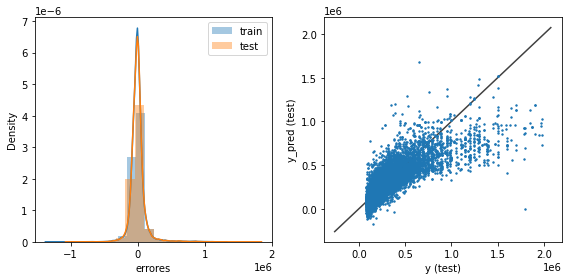

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 13090.532841744285
Raíz del error cuadrático medio en Test: 81560.961857905


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


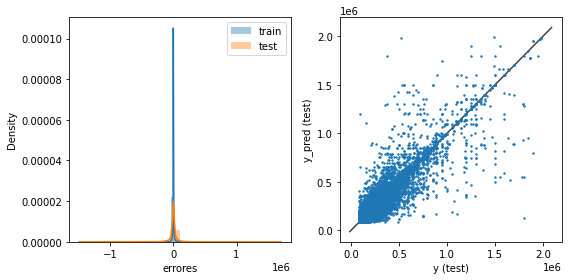

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

#--------------------------
## Benchmark: linear model:
#--------------------------

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#print(linear_model.coef_, linear_model.intercept_)

#--------------------
## B.2) DecisionTree:
#--------------------

tree_regressor = DecisionTreeRegressor(max_depth=23, random_state=42)
tree_regressor.fit(X_train, y_train)
  
##-------------------------------
# Calculos de errores y graficos:
##-------------------------------


modelos = ['Regresión lineal', 'Árbol de Decisión']

for i, model in enumerate([linear_model, tree_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')

    ## Estas son las metricas que voy a usar a lo largo del desarrollo de todos los 
    #  modelos de ML que voy a ir haciendo para tratar de llegar a un óptimo:

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) # error cuadrático en USD
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

## **Optimización de Hiper Parámetro Depth:**
- Como es un nuevo modelo (Datos escalados + encodeados) quisas el punto de menor RMSE está en otro lado distinto que para el modelo anterior sin datos escalados.

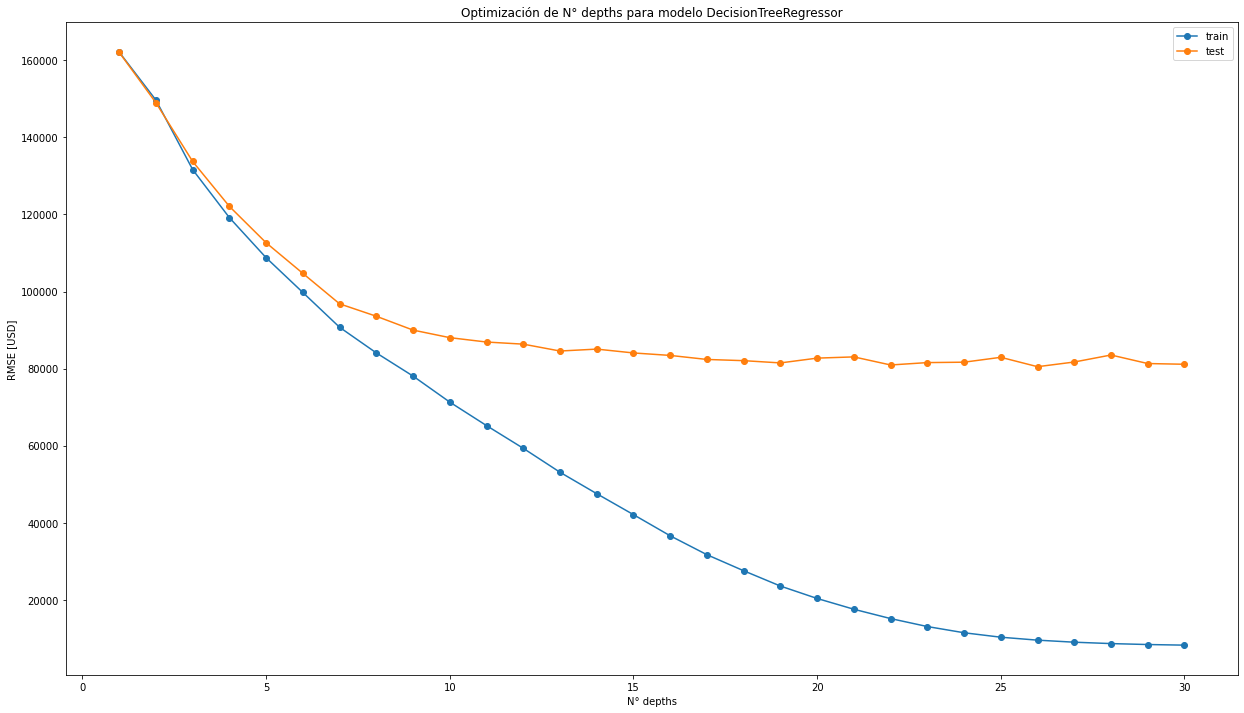

In [ ]:
#--------------------
## B.2) DecisionTree:
#--------------------

# Definimos las listas vacias para los valores de RMSE deseados:

lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de k que vamos a explorar:

max_depths = 30
n_depths = list(range(1,max_depths+1)) 

# Generamos un loop sobre los distintos valores de k 
for k in n_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf =  DecisionTreeRegressor(max_depth=k, random_state=42)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) # error cuadrático en USD
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred)) 
    
    # Agregar la información a las listas
    lista_rmse_train.append(rmse_train )
    lista_rmse_test.append(rmse_test)


fig= plt.figure(figsize=(21,12))
plt.plot(n_depths,lista_rmse_train,'o-',label='train' )
plt.plot(n_depths,lista_rmse_test,'o-',label='test')
plt.legend()
plt.xlabel('N° depths')
plt.ylabel('RMSE [USD]')
plt.title('Optimización de N° depths para modelo DecisionTreeRegressor')
plt.show()

# **Últimas conclusiones**:
- El RMSE en Test para este Tree con X **encodeado** y **escalado** con la max depth optimizada a 23 profundidades es alto y peor que para el modelo con 18 depths optimizadas y X solo encodeada, sin escalar. **USD 81.560 vs USD 81.043**.
- USD 81.043 sigue siendo el mejor resultado hasta ahora.
- El Tree sigue siendo mejor que el benchmark.
- El Tree con depth de 23 vs depth 18 empeoró en **un 0.6% en el RMSE.**

#Lo que sucede acá es que, se intentó escalar variables que ya de porsí tienen valores bastante cercanos entre sí, por eso no se aprecia casi ninguna mejora en el rendimiento del modelo.

# B) **Modelos avanzados**:

Elección de modelos avanzados.
Voy a elejir los siguientes modelos:
- 1) Regresión lineal con atributos polinómicos y regularización.
- 2) (OTRO).

## 1) Regresión lineal con atributos polinómicos y Regularización:
De la sección anterior ya tengo heho:
- X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42).
- Los parámetros son: 30 % de test size y random state de 42.

Además prestar atención a la siguiente nota:

**Nota**: Voy a usar los datos de train y test escalados y encodeados de la sección anterior. Estos son: 

- **data_scaled_df**, que se encodea con One Hot encoder a:
- **X_transf**.

In [ ]:
# Importo las librerías que voy a usar para esta sección:
##LinearRegression ya la importé pero la repito aca por comodidad.

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Creo mis atributos polonómicos sobre X_train y X_test encodeados y escalados: 
## Como no conozco la relación fucional entre los datos, pruevo con un grado 2 para empezar:

poly = PolynomialFeatures(3, include_bias=False)
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)

In [ ]:
# Entreno una regresión lineal y velo los coeficientes obtenidos:

reg_1 = LinearRegression()
reg_1.fit(X_train_new, y_train)
print(reg_1.coef_, reg_1.intercept_)

# Predigo sobre el conjubto de train y test "new" con atributos polinómicos:

y_train_pred_1 = reg_1.predict(X_train_new)
y_test_pred_1 = reg_1.predict(X_test_new)

KeyboardInterrupt: ignored

**Preguntas para la clase de mañana:**
- ¿La creación de atributos polinómicos debe hacerse solo par las variables numércias?
- ¿Que pasa cuando encodeo con el One Hot encoder? No tienen relación numérica.
- ¿Puedo agregar atributos polinómicos solo a las variables numéricas? Esto en el caso que haya encodeado varibales categoricas con el one hot enconder.
- ¿Como puedo entender la relación f(x)/funcionalidad entre mis variables predictoras y mi variable target? 

In [ ]:
# Calculo de errores RMSE:

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_1)) # error cuadrático en USD
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_1))

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 81176.17761545313
Raíz del error cuadrático medio en Test: 85958.08719890619


**Primeras conclusiones**: Con atributos polinómicos de grado 2, el RMSE da:
- USD 81176.17 para Test.
- USD 85958.08 para Train. Redordemos que para el Árbol con 16 depths y solo los datos encodeados sin escalar el RMSE dio USD USD 81.043.

Voy a probar aumentando el grado.